### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

#### 3. Random Networks

# Lecture 11: Erdös-Rényi Random Graph Models.

A [random graph](https://en.wikipedia.org/wiki/Random_graph) is a mathematical model of a family of networks, where certain parameters (like the number of nodes and edges) have fixed values, but other aspects (like the actual edges) are randomly assigned. The simplest example of a random graph is in fact the network $G(n,m)$ with fixed numbers $n$ of nodes and $m$ of edges, placed randomly between the vertices. Although a random graph is not a specific object, many of its properties can be described precisely, in the form of expected values, or probability distributions.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Erdos_generated_network-p0.01.jpg/1280px-Erdos_generated_network-p0.01.jpg">

## Randomly Selected Edges

Let us denote by $G(n, m)$ a network with $n$ nodes and $m$ chosen
edges, chosen uniformly at random (out of the possible
$\binom{n}{2}$).  Equivalently, one can choose uniformly at random
one network in the **set** $G(n, m)$ of **all** networks on a given set
of $n$ nodes with **exactly** $m$ edges.

<div class="alert">

**Definition (ER Model $A$: Uniform Random Graphs).**
Let $n \geq 1$, let $N = \binom{n}{2}$ and let $0 \leq m \leq N$.

The model $G(n, m)$ consists of the ensemble of graphs $G$
with $n$ nodes $X = \{1, 2, \dots, n\}$, and $m$ randomly selected
edges, chosen uniformly from the $N$ possible edges.

</div>

One could think of $G(n, m)$ as a probability distribution
$P \colon G(n, m) \to \mathbb{R}$,
that assigns to each network $G \in G(n, m)$ the same probability
$$
P(G) = \binom{N}{m}^{-1},
$$
where $N = \binom{n}{2}$.

For example ...

<img src="random-gnm.png">

In order to make some random graphs, we first need to import the standard libraries ...

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

... and the `random` module, for a function `choice` that selects a random element from a list.

In [2]:
import random

Picking edges at random involves picking several ($2$ to be precise)
nodes from the list of nodes of a graph, avoiding repetition.  A simple
algorithm for selection without repetition can be based on the following
function `pick`, which works on a set `elements` and a subset `chosen`
of already chosen elements, as follows:
1. pick a random element `x` from the set `elements`
2. if `x` is in the subset `chosen` go back to step 1, else return `x`.

In [3]:
def pick(elements, chosen = []):
    while True:
        x = random.choice(elements)
        if x not in chosen:
            return x

**Note.** This algorithm (and its implementation here) has no explict termination condition. 
Hence, under unfortunate circumstances, it may run for a very long time, or indeed forever ...

In [4]:
lll = [2, 3, 5, 7, 11, 13, 17, 19]
pick(lll, [2,3,5,7,11,13])

19

To select $l$ random elements, simply `pick` $l$ times, while 
keeping track of already selected elements in a list `chosen`.

In [5]:
def pick_elements(elements, count):
    chosen = []
    for i in range(count):
        chosen.append(pick(elements, chosen))
    return chosen

In [6]:
lll = [2, 3, 5, 7, 11, 13, 17, 19]
pick_elements(lll, 3)

[17, 19, 13]

**Note.** Suppose the vertex set $X$ has $n$ elements and that $k$ elements
$$
(x_0, x_1, \dots, x_{k-1})
$$
have already been chosen.
Then the next element $x_k$ is chosen with probability $\frac1{n-k}$ (from
the $n-k$ remaining elements at this stage:

Clearly, $x_0$ is chosen with probability $\frac1n$ from the $n$ elements.
Next, in a first draw $x_1$ is chosen with probability $\frac1n$.
With the same probability $\frac1n$, this first draw produces element $x_0$
again, in which case a second draw has to be carried out, where $x_1$
has another chance of $\frac1n$ to be drawn. And $x_0$ too, calling for a third
draw, and so on.  In total, $x_1$'s chances of being drawn are
$$
P(x_1) = \frac1n + \frac1{n^2} + \frac1{n^3} + \dotsm 
= \frac1n \sum_{l \geq 0} \bigl(\frac1n\bigr)^l
= \frac1n \frac1{1 - \frac1n}
= \frac1{n-1}.
$$

Similarly, $x_k$'s chances of being drawn are
$$
P(x_k) = \frac1n + \frac{k}{n^2} + \frac{k^2}{n^3} + \dotsm 
= \frac1n \sum_{l \geq 0} \bigl(\frac{k}{n}\bigr)^l
= \frac1n \frac1{1 - \frac{k}{n}}
= \frac1{n-k}.
$$



To pick a random edge means to pick $2$ elements from the node set of $G$.
Again, one can use a list of already chosen edges to avoid repetition.

In [7]:
def pick_edge(G, chosen):
    while True:
        edge = pick_elements(list(G.nodes()), 2)
        edge.sort()
        if edge not in chosen:
            return edge

In [8]:
G = nx.Graph()
G.add_nodes_from(range(16))

In [9]:
list(G.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [10]:
pick_edge(G, [[11,14]])

[8, 13]

To pick $m$ edges, without repetition, simply apply `pick_edge` $m$ times.

In [11]:
def pick_edges(G, m):
    chosen = []
    for i in range(m):
        chosen.append(pick_edge(G, chosen))
    return chosen

Now we have all the building blocks for a function `random_graph_A` that
takes the order $n$ and the size $m$ of a random ER graph of type A
as arguments, and constructs such a graph.

In [12]:
def random_graph_A(n, m):
    """construct a random type A graph
    with n nodes and m = links"""
    G = nx.Graph()
    G.add_nodes_from(range(n))
    G.add_edges_from(pick_edges(G, m))
    return G

Now we can construct and draw a random graph on $16$ vertices with $15$ edges.

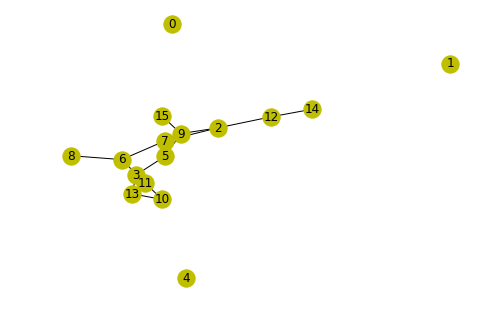

In [13]:
G = random_graph_A(16, 15)
nx.draw(G, with_labels = True, node_color = 'y')

The `networkx` version of this random graph constructor is called `gnm_random_graph`
and should produce the same random graphs with the same probability. 

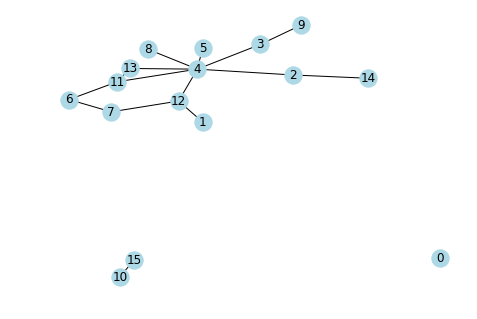

In [14]:
G = nx.gnm_random_graph(16, 15)
nx.draw(G, with_labels = True, node_color = 'lightblue')

In [15]:
list(G.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

## An Animated Random Graph

In [16]:
%%html
<script src="https://d3js.org/d3.v3.min.js"></script>

In [17]:
%%html
<div id="random">
<div id="count"></div>
  <link rel="stylesheet" href="random.css">
  <script src="random.js"></script>
</div>

<div class="alert">

**Definition (ER Model $B$: Binomial Random Graphs).**
Let $n \geq 1$, let $N = \binom{n}{2}$ and let $0 \leq p \leq 1$.


The model $G(n, p)$ consists of the ensemble of graphs $G$
with $n$ nodes $X = \{1, 2, \dots, n\}$, and each of the $N$
possible edges chosen with probability $p$.
</div>

The probability $P_G$ of a particular graph $G = (X, E)$ with 
$X = \{1, 2, \dots, n\}$ and
$m = |E|$ edges in the $G(n, p)$ model is
$$
P_G = p^m(1-p)^{N-m}.
$$

For example ...

<img src="random-gnp.png">

Such a random graph is easy to generate programmatically, using python's basic random number generator
`random.random()` which returns a random number in the (half-open) interval $[0, 1)$,
every time it is called.  If this number is less then $p$, we include the edge, if not we don't.

In [18]:
def random_graph_B(n, p):
    """construct a random type B graph
    with n nodes and edge probability p"""
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for a in range(n):
        for b in range(a):
            if random.random() < p:
                G.add_edge(a, b)
    return G

In [19]:
15/120

0.125

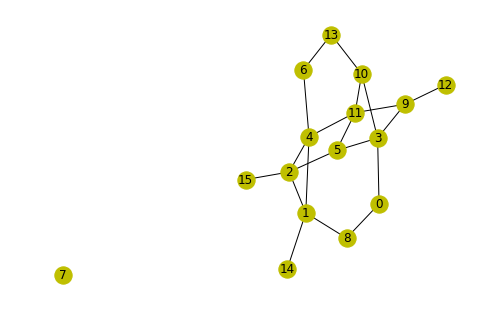

In [20]:
G = random_graph_B(16, 0.125)
nx.draw(G, with_labels=True, node_color = 'y')

In [21]:
G.number_of_nodes(), G.number_of_edges()

(16, 20)

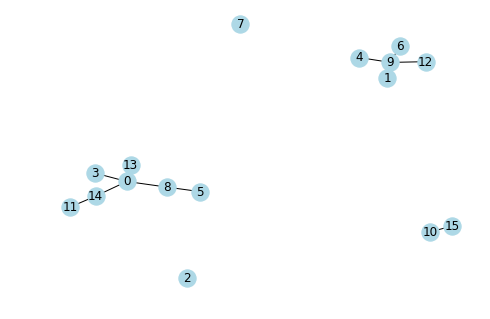

In [22]:
G = nx.gnp_random_graph(16,0.125)
nx.draw(G, with_labels=True, node_color='lightblue')

In [23]:
G.number_of_nodes(), G.number_of_edges()

(16, 11)